Missing values:
 Study Hours    0
Attendance     0
Pass           0
dtype: int64


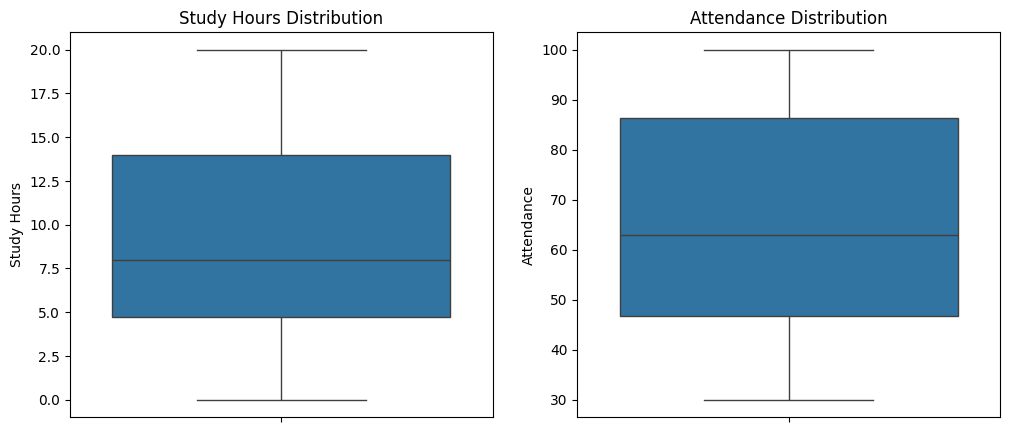

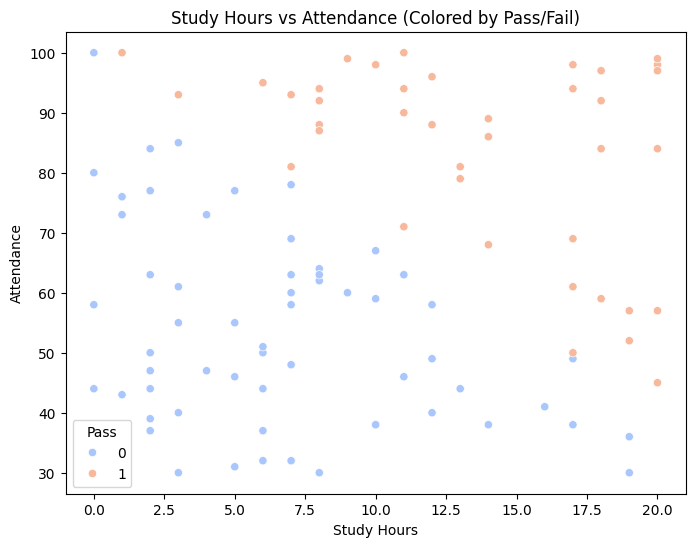

Model Accuracy: 1.00
Confusion Matrix:
 [[11  0]
 [ 0  9]]


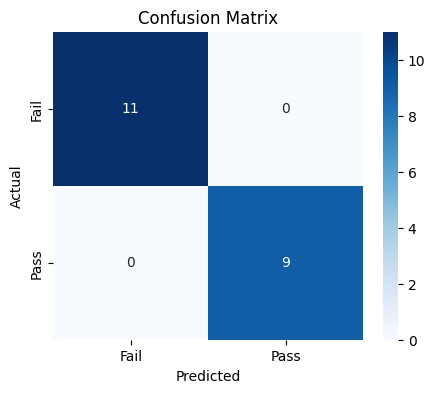

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Model Coefficients: Study Hours: 1.58, Attendance: 0.53
Intercept: -53.03
Study Hours has a stronger influence on passing than Attendance.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
file_path = "E:\\New folder\\student_pass_fail_extended.csv"  # Update this path if necessary
df = pd.read_csv(file_path)

# 1. Data Exploration
## Check for missing values
print("Missing values:\n", df.isnull().sum())

## Check for outliers using box plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df["Study Hours"])
plt.title("Study Hours Distribution")

plt.subplot(1, 2, 2)
sns.boxplot(y=df["Attendance"])
plt.title("Attendance Distribution")
plt.show()

## Visualizing the relationship between Study Hours, Attendance, and Pass
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Study Hours"], y=df["Attendance"], hue=df["Pass"], palette="coolwarm")
plt.xlabel("Study Hours")
plt.ylabel("Attendance")
plt.title("Study Hours vs Attendance (Colored by Pass/Fail)")
plt.show()

# 2. Model Training
X = df[["Study Hours", "Attendance"]]
y = df["Pass"]

# Splitting the dataset into training and test sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# 3. Model Evaluation
y_pred = model.predict(X_test)

## Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

## Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

## Visualizing Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fail", "Pass"], yticklabels=["Fail", "Pass"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# 4. Insights
coef = model.coef_[0]
intercept = model.intercept_[0]
print(f"Model Coefficients: Study Hours: {coef[0]:.2f}, Attendance: {coef[1]:.2f}")
print(f"Intercept: {intercept:.2f}")

if abs(coef[0]) > abs(coef[1]):
    print("Study Hours has a stronger influence on passing than Attendance.")
else:
    print("Attendance has a stronger influence on passing than Study Hours.")

Accuracy: 0.50
Precision: 1.00
Recall: 0.00
F1-Score: 0.00


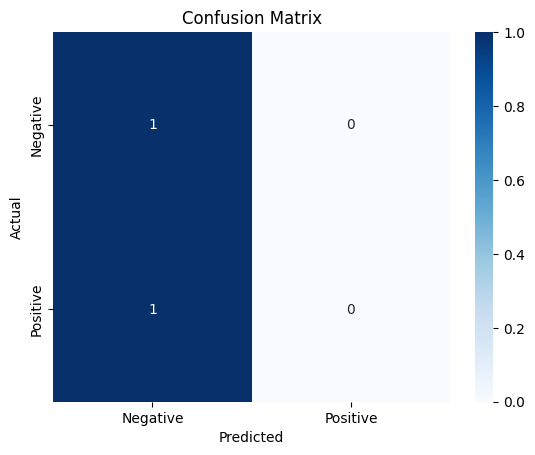


Correctly Classified Examples:
                        Cleaned_Review  Actual  Predicted  Correct
1  terrible experience would recommend       0          0     True

Incorrectly Classified Examples:
                Cleaned_Review  Actual  Predicted  Correct
8  superb exceeded expectation       1          0    False


In [2]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import os
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Set local NLTK data path
nltk_data_path = os.path.expanduser("~/nltk_data")
nltk.data.path.append(nltk_data_path)

# Ensure NLTK data is available manually
try:
    stop_words = set(stopwords.words('english'))
    wordnet_lemmatizer = WordNetLemmatizer()
except LookupError:
    print("NLTK data missing. Please download stopwords and wordnet manually.")
    stop_words = set()
    wordnet_lemmatizer = None

# Load dataset
file_path = "E:\\New folder\\reviews.csv"
df = pd.read_csv(file_path)

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(f"[{string.punctuation}]", "", text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    if wordnet_lemmatizer:
        tokens = [wordnet_lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize words
    return " ".join(tokens)

# Apply preprocessing
df["Cleaned_Review"] = df["Review Text"].apply(preprocess_text)

# Convert sentiment labels to numerical (0: negative, 1: positive)
df["Sentiment"] = df["Sentiment"].map({"negative": 0, "positive": 1})

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(df["Cleaned_Review"], df["Sentiment"], test_size=0.2, random_state=42)

# Vectorization using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = model.predict(X_test_tfidf)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Display sample correct and incorrect predictions
df_test = X_test.to_frame()
df_test["Actual"] = y_test.values
df_test["Predicted"] = y_pred
df_test["Correct"] = df_test["Actual"] == df_test["Predicted"]

print("\nCorrectly Classified Examples:")
correct_samples = df_test[df_test["Correct"]]
if len(correct_samples) > 0:
    print(correct_samples.sample(min(3, len(correct_samples))))
else:
    print("No correct classifications.")

print("\nIncorrectly Classified Examples:")
incorrect_samples = df_test[~df_test["Correct"]]
if len(incorrect_samples) > 0:
    print(incorrect_samples.sample(min(3, len(incorrect_samples))))
else:
    print("No incorrect classifications.")
